### E-Commerce Product Recall Prediction

**Table of Contents**
1. [Load Data Set](#A)
    * [Printing Head and Tail](#B)
    * [Basic Analysis](#MF)
    * [Data Cleaning](#T)
2. [Data Visualisation](#K)
    * [Heatmap](#R)
    * [Histogram](#F)

In [26]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

<a id = "A"></a>
### Load Data Set

In [27]:
dfecom = pd.read_csv("E-Commerce.csv")
print("File read successfully")

File read successfully


<a id = "B"></a>
### Printing Head and Tail

In [28]:
dfecom.head() #head

,Timestamp,What is your name?,What is your age group?,What is your gender?,What is your region/location?,Which type of products do you shop for most frequently online?,Have you ever bought a product online that was later recalled by the manufacturer/seller?,How often do you check product reviews before purchasing?,Which factors in reviews influence you the most?,How much do you trust online product reviews?,Have you ever reported/flagged a defective or unsafe product on an e-commerce platform?,Would you like platforms to alert customers earlier about potentially unsafe/defective products?,Which recall-related information do you consider most important?,Do you think analyzing customer reviews can help predict unsafe products before official recalls?,Would you trust a system that warns you about “high-risk” products before you buy them?,Any personal experience or story related to unsafe/defective online products?
0,2025/09/16 11:39:49 PM GMT+5:30,Abhikant Kumar,18–24,Male,Pari Chowk,Clothing & Apparel,Yes,Often,Star ratings,Moderately,Yes,Yes,Refund/return policy,Yes,Yes,none
1,2025/09/16 11:50:23 PM GMT+5:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025/09/16 11:50:44 PM GMT+5:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025/09/16 11:53:05 PM GMT+5:30,Aman kumar,18–24,Male,Greater Noida,Electronics,Maybe / Not Sure,Always,"Product safety concerns (e.g., fire hazard, al...",Slightly,Yes,Yes,"Reason for recall (safety issue, defect, hazard)",Yes,Yes,NaN
4,2025/09/16 11:56:32 PM GMT+5:30,Nikhil Kumar,18–24,Male,Greater Noida,Clothing & Apparel,Maybe / Not Sure,Always,Negative/complaint reviews,Completely,Yes,No,Refund/return policy,Yes,Yes,Some times wrong product to be delivered


<b>Description of Head</b>

1. The image shows the first few rows of a survey data set displayed using "df.ecom.head()".
2. It contains participant responses about online shopping behavior and experiences with unsafe or defective products.

In [29]:
dfecom.tail()

,Timestamp,What is your name?,What is your age group?,What is your gender?,What is your region/location?,Which type of products do you shop for most frequently online?,Have you ever bought a product online that was later recalled by the manufacturer/seller?,How often do you check product reviews before purchasing?,Which factors in reviews influence you the most?,How much do you trust online product reviews?,Have you ever reported/flagged a defective or unsafe product on an e-commerce platform?,Would you like platforms to alert customers earlier about potentially unsafe/defective products?,Which recall-related information do you consider most important?,Do you think analyzing customer reviews can help predict unsafe products before official recalls?,Would you trust a system that warns you about “high-risk” products before you buy them?,Any personal experience or story related to unsafe/defective online products?
78,2025/09/20 1:21:02 AM GMT+5:30,sushant,18–24,Male,pune,Clothing & Apparel,Yes,Always,Star ratings;Negative/complaint reviews;Produc...,Completely,No,Maybe,Refund/return policy,Yes,Yes,lots of experience
79,2025/09/20 1:23:05 AM GMT+5:30,Kashish,18–24,Male,mumbai,Clothing & Apparel,No,Always,Star ratings;Negative/complaint reviews;Produc...,Completely,No,Maybe,Official safety warnings,Maybe,Maybe,NaN
80,2025/09/25 12:38:11 PM GMT+5:30,Aniket,18–24,Male,Greater Noida,Clothing & Apparel,Yes,Often,"Star ratings;Product safety concerns (e.g., fi...",Moderately,Yes,Maybe,"Reason for recall (safety issue, defect, hazard)",Maybe,Yes,NaN
81,2025/10/03 7:40:49 PM GMT+5:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2025/10/03 7:42:22 PM GMT+5:30,Himanshu Sharma,18–24,Male,Hindu,Others,Yes,Sometimes,Star ratings,Not at all,Yes,Yes,Replacement availability,Yes,Yes,Yes


<b>Description of tail</b>

1. The image shows the last few rows of the e-commerce survey dataset using 'df.ecom.tail()'.
2.  It includes participant responses about trust in online reviews, product recalls, and experiences with unsafe or defective products.

In [30]:
#print Info
dfecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 16 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   Timestamp                                                                                              83 non-null     object
 1     What is your name?                                                                                   75 non-null     object
 2     What is your age group?                                                                              77 non-null     object
 3     What is your gender?                                                                                 79 non-null     object
 4     What is your region/location?                                                                        76 

<b>Description of info</b>

1. This output from "df.info()" shows a pandas DataFrame with 83 entries and 16 columns.
2.  All columns, which are primarily questions from a survey, are currently of the object Dtype and have varying counts of non-null values.
3.  The DataFrame consumes 10.5+ KB of memory.

## Finding Null Value Count

In [31]:
dfecom.isnull().sum()

Timestamp                                                                                                 0
  What is your name?                                                                                      8
  What is your age group?                                                                                 6
  What is your gender?                                                                                    4
  What is your region/location?                                                                           7
Which type of products do you shop for most frequently online?                                            4
  Have you ever bought a product online that was later recalled by the manufacturer/seller?               5
  How often do you check product reviews before purchasing?                                               5
  Which factors in reviews influence you the most?                                                        4
  How much do you trust onli

<b>Description</b>

1. This output from "dfcom.isnull().sum()" shows the count of missing values for each column in the DataFrame.
2.  The 'Timestamp' column has 0 missing values, while the column for 'Any personal experience or story related to unsafe/defective online products?' has the highest number of missing values at 48.

<b><u>Counting Unique Values</b></u>

In [32]:
dfecom.nunique()

Timestamp                                                                                                83
  What is your name?                                                                                     72
  What is your age group?                                                                                 4
  What is your gender?                                                                                    2
  What is your region/location?                                                                          53
Which type of products do you shop for most frequently online?                                            6
  Have you ever bought a product online that was later recalled by the manufacturer/seller?               3
  How often do you check product reviews before purchasing?                                               5
  Which factors in reviews influence you the most?                                                       21
  How much do you trust onli

<b>Description</b>

1. This output from "dfcom.nunique()" shows the number of unique values for each column in the DataFrame.
2.  The 'Timestamp' column has 83 unique values, indicating they are all distinct, while categorical columns like 'What is your gender?' and 'Have you ever reported/flagged a defective or unsafe product on an e-commerce platform?' have the minimum of 2 unique values.

<a id = "MF"></a>
### Basic Analysis

In [33]:
dfecom.describe()

,Timestamp,What is your name?,What is your age group?,What is your gender?,What is your region/location?,Which type of products do you shop for most frequently online?,Have you ever bought a product online that was later recalled by the manufacturer/seller?,How often do you check product reviews before purchasing?,Which factors in reviews influence you the most?,How much do you trust online product reviews?,Have you ever reported/flagged a defective or unsafe product on an e-commerce platform?,Would you like platforms to alert customers earlier about potentially unsafe/defective products?,Which recall-related information do you consider most important?,Do you think analyzing customer reviews can help predict unsafe products before official recalls?,Would you trust a system that warns you about “high-risk” products before you buy them?,Any personal experience or story related to unsafe/defective online products?
count,83,75,77,79,76,79,78,78,79,78,78,78,79,78,78,35
unique,83,72,4,2,53,6,3,5,21,4,2,3,4,3,3,24
top,2025/09/16 11:39:49 PM GMT+5:30,Aman kumar,18–24,Male,Greater Noida,Clothing & Apparel,Yes,Always,Star ratings,Moderately,Yes,Yes,Refund/return policy,Yes,Yes,No
freq,1,2,70,63,6,33,39,57,23,44,64,60,43,58,51,11


<b>Description</b>

1. This output from 'dfcom.describe(include='object')' provides a summary of the non-numeric columns in the DataFrame.
2. Key statistics include the total count of non-null entries, the number of unique values (unique), the most frequent value (top), and its frequency (freq) for each column.

<a id = "T"></a>
## Data Cleaning

In [34]:
# Clean up spaces in all column names
dfecom.columns = dfecom.columns.str.strip()

# Check cleaned names
print(dfecom.columns)


Index(['Timestamp', 'What is your name?', 'What is your age group?',
       'What is your gender?', 'What is your region/location?',
       'Which type of products do you shop for most frequently online?',
       'Have you ever bought a product online that was later recalled by the manufacturer/seller?',
       'How often do you check product reviews before purchasing?',
       'Which factors in reviews influence you the most?',
       'How much do you trust online product reviews?',
       'Have you ever reported/flagged a defective or unsafe product on an e-commerce platform?',
       'Would you like platforms to alert customers earlier about potentially unsafe/defective products?',
       'Which recall-related information do you consider most important?',
       'Do you think analyzing customer reviews can help predict unsafe products before official recalls?',
       'Would you trust a system that warns you about “high-risk” products before you buy them?',
       'Any personal expe

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all text columns
for col in dfecom.columns:
    if dfecom[col].dtype == 'object':
        dfecom[col] = le.fit_transform(dfecom[col].astype(str))


<a id = "K"></a>
## Data Visualization

<b>Work With the Cleaned Column</b>

Count of Respondents by Gender Graph

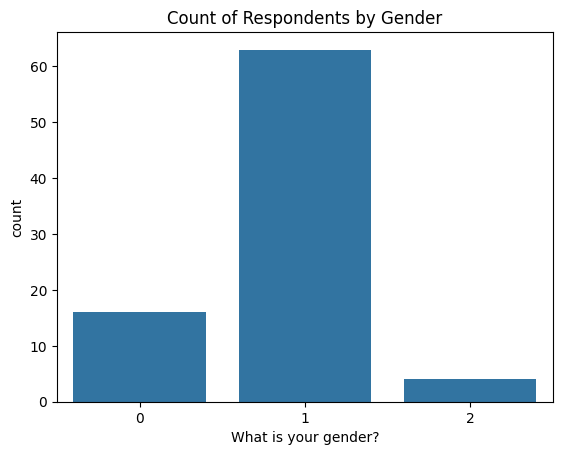

In [36]:
sns.countplot(x='What is your gender?', data=dfecom)
plt.title('Count of Respondents by Gender')
plt.show()


Most Common Age Group

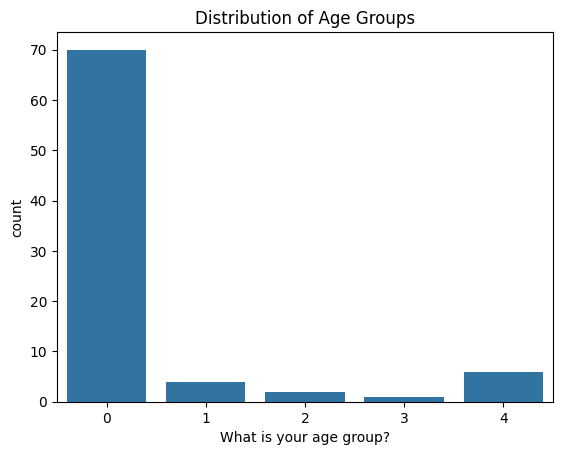

In [37]:
sns.countplot(x='What is your age group?', data=dfecom)
plt.title('Distribution of Age Groups')
plt.show()


Most Frequent Product Type

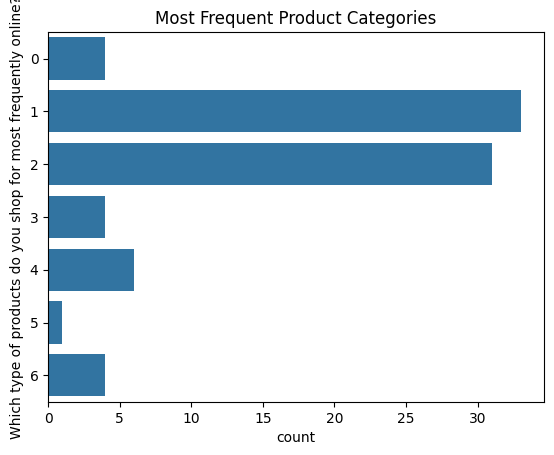

In [38]:
sns.countplot(y='Which type of products do you shop for most frequently online?', data=dfecom)
plt.title('Most Frequent Product Categories')
plt.show()


How Often People Check Reviews

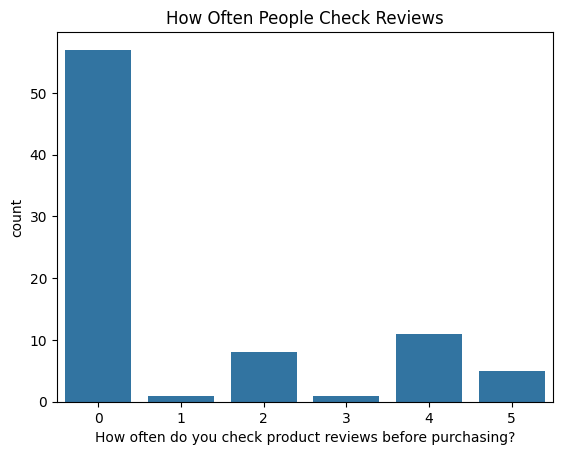

In [39]:
sns.countplot(x='How often do you check product reviews before purchasing?', data=dfecom)
plt.title('How Often People Check Reviews')
plt.show()


Trust in Reviews

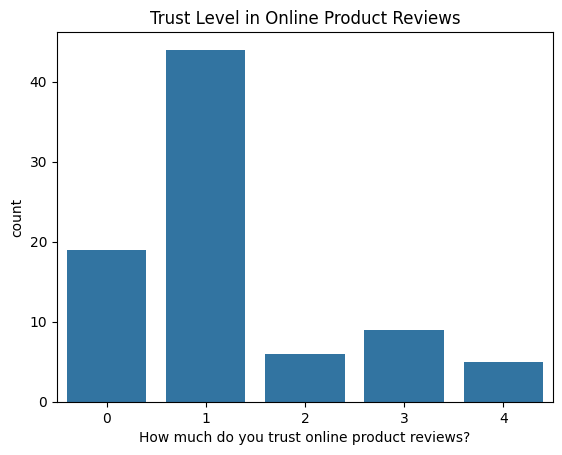

In [40]:
sns.countplot(x='How much do you trust online product reviews?', data=dfecom)
plt.title('Trust Level in Online Product Reviews')
plt.show()


Want Early Alerts About Unsafe Products

<a id = "R"></a>
#### Heat Map
Heat map is useful if you want to see any correlations between attributes. We'll see correlations between math, reading, and writing score.

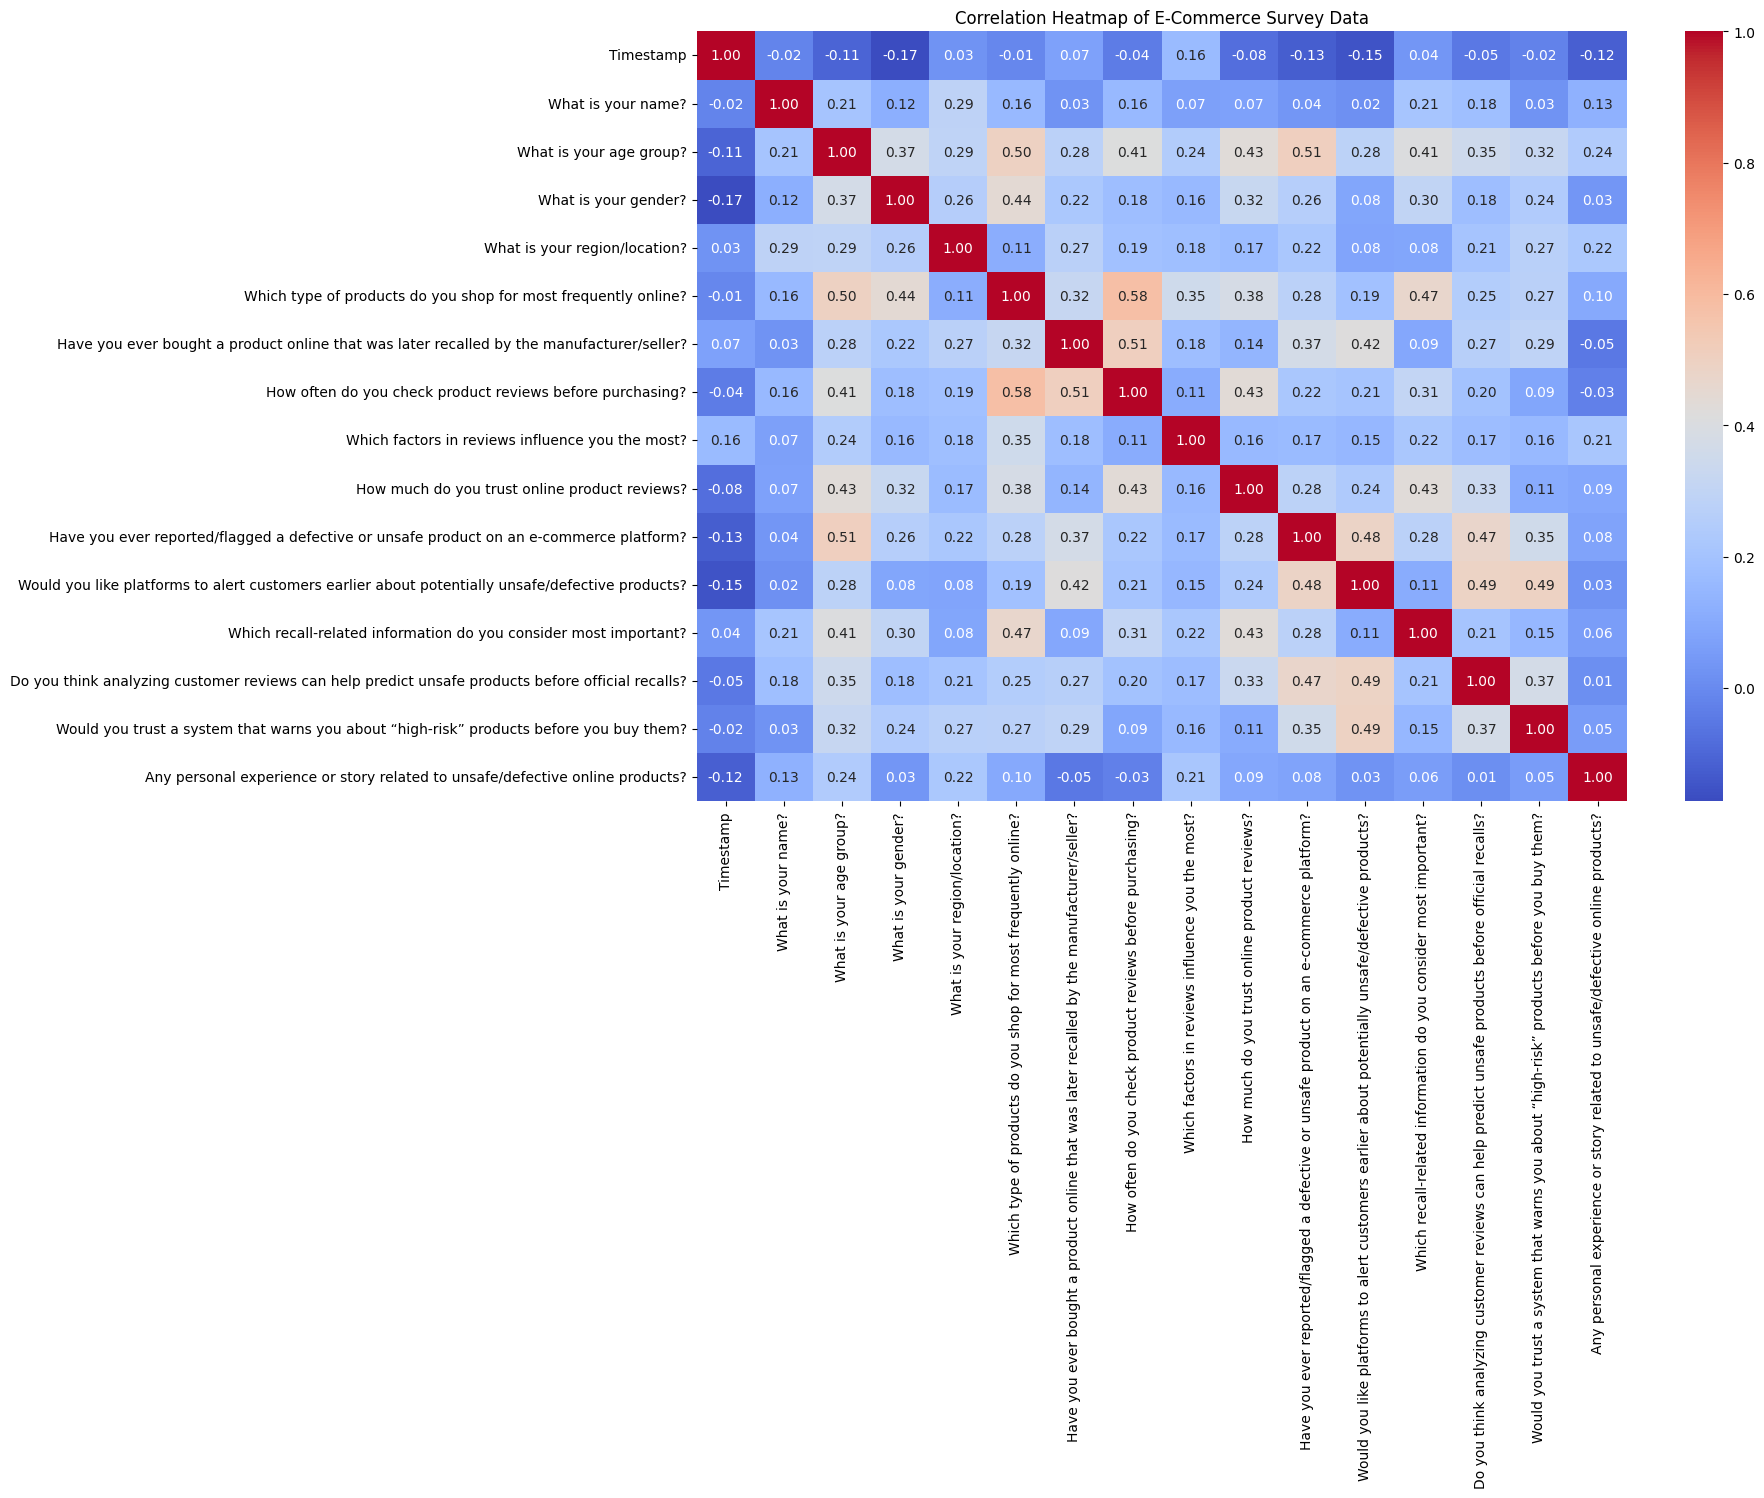

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(dfecom.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of E-Commerce Survey Data")
plt.show()


<u><b>Description of heatmap</u></b>

1. The heatmap shows how different survey answers are related to each other.
2. Darker or brighter colors mean a stronger relationship between two factors.
3. It helps identify which behaviors or opinions are most connected in the E-Commerce data.
4. This visualization makes it easy to spot patterns, such as how trust in reviews relates to buying habits or product preferences.

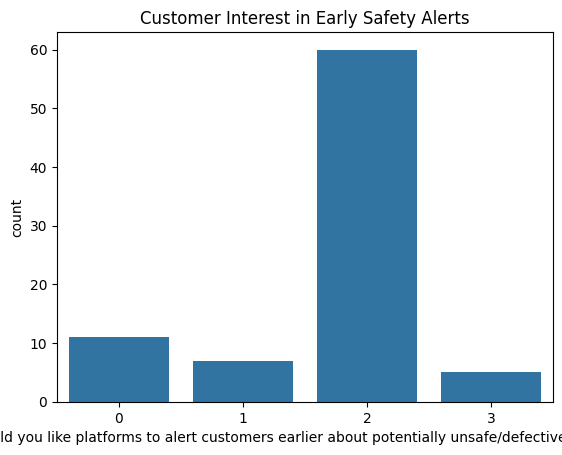

In [42]:
sns.countplot(x='Would you like platforms to alert customers earlier about potentially unsafe/defective products?', data=dfecom)
plt.title('Customer Interest in Early Safety Alerts')
plt.show()


<a id = "F"></a>
### Histogram

Distribution of Age Groups graph

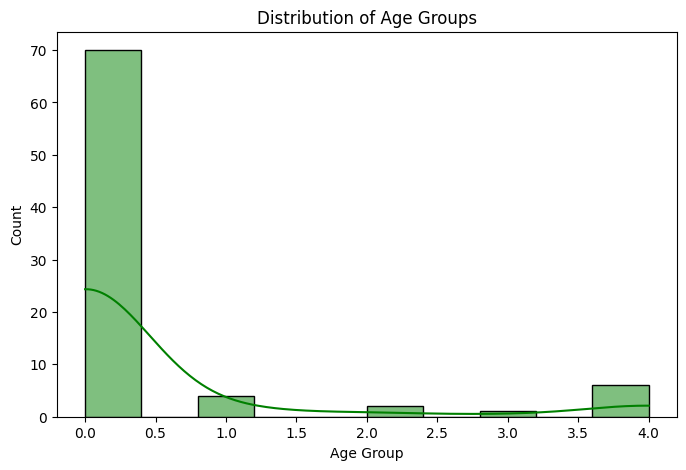

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(dfecom['What is your age group?'], color='green', bins=10, kde=True)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Data Validation

In [44]:
# Step 1: Encode text columns (convert to numbers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfecom.columns:
    if dfecom[col].dtype == 'object':
        dfecom[col] = le.fit_transform(dfecom[col].astype(str))

In [45]:
# Step 2: Choose features (X) and target (y)
# Example: Predict "How much do you trust online product reviews?"
X = dfecom.drop('How much do you trust online product reviews?', axis=1)
y = dfecom['How much do you trust online product reviews?']

In [46]:
# Step 3: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Step 4: (Optional) Standardize numeric values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b><u>Training Logistic Regression Model</b></u>

In [48]:
# Step 5: Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [49]:
# Step 6: Validate (Test the model)
y_pred = model.predict(X_test)

In [50]:
# Step 7: Print validation results
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Model Accuracy: 0.47058823529411764

Confusion Matrix:
 [[0 5 1]
 [1 8 1]
 [0 1 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.57      0.80      0.67        10
           2       0.00      0.00      0.00         1

    accuracy                           0.47        17
   macro avg       0.19      0.27      0.22        17
weighted avg       0.34      0.47      0.39        17

